In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.drop(['day', 'month', 'year', 'Classes'], axis = 1, inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [4]:
X = df.drop('FWI', axis = 1)
y = df['FWI']

In [5]:
X.shape, y.shape

((243, 10), (243,))

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25, random_state=42)

In [7]:
X_train.shape,X_test.shape

((182, 10), (61, 10))

<Axes: >

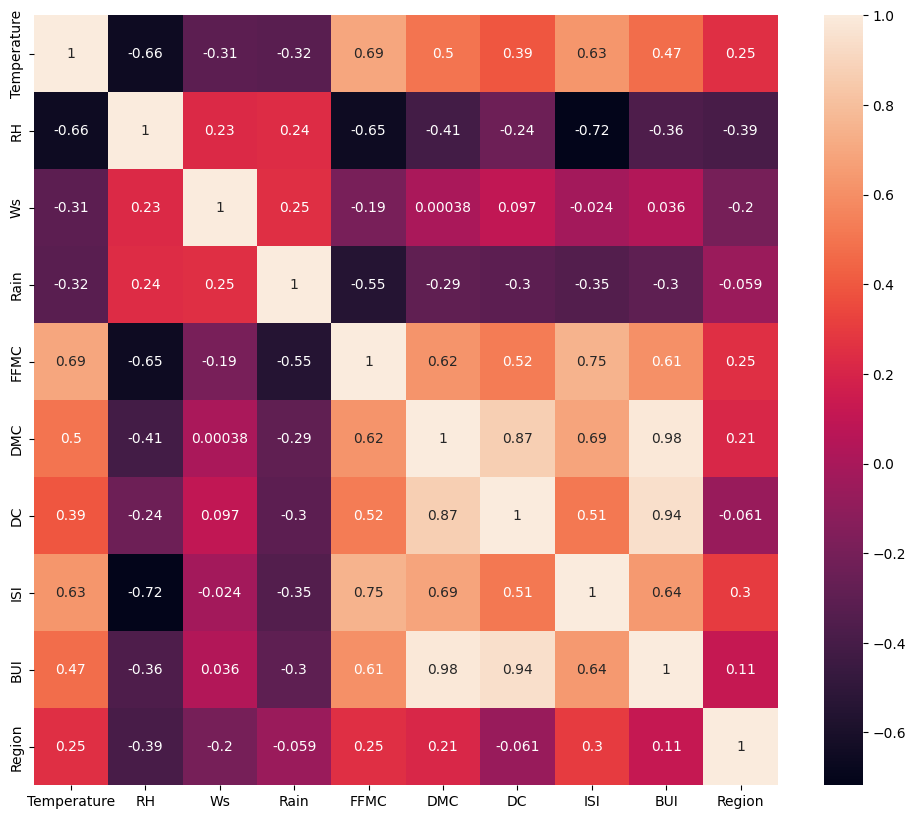

In [8]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [9]:
def correlation(dataset, threshold):
  col_corr =set()
  col_matrix = dataset.corr()
  for i in range(len(col_matrix.columns)):
    for j in range(i):
      if abs(col_matrix.iloc[i,j]) > threshold:
        colname = col_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [10]:
corr_features = correlation(X_train, 0.85)

In [11]:
X_train.drop(corr_features, axis=1, inplace = True)
X_test.drop(corr_features, axis=1, inplace = True)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'Box plot after scaling')

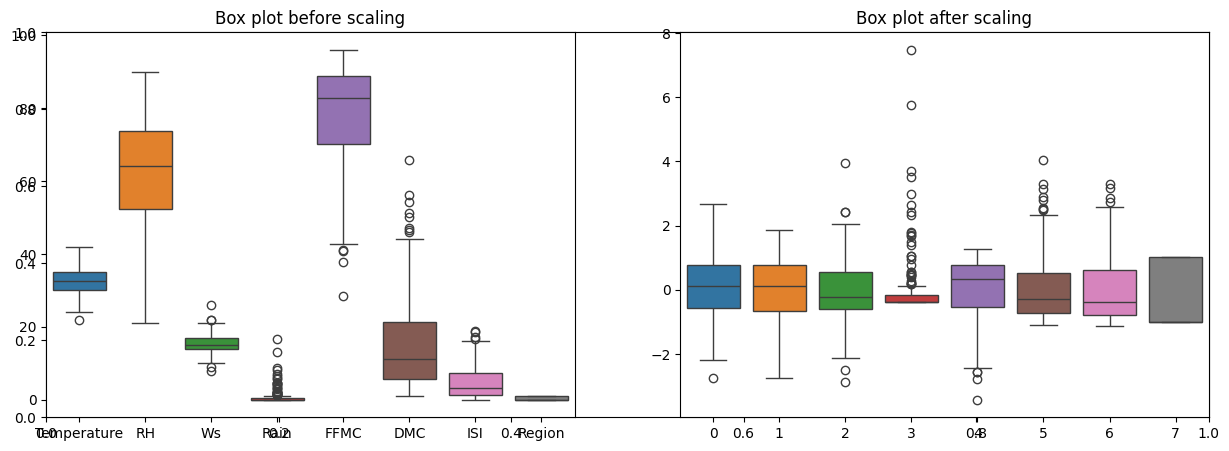

In [14]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Box plot before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("Box plot after scaling")

In [15]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [16]:
def print_model_scores(y_test, y_pred, X_test):
    """
    Calculate and print various regression metrics in a formatted message.

    Parameters:
    y_test (array-like): True values.
    y_pred (array-like): Predicted values.
    X_test (array-like): Test features used to calculate Adjusted R-squared Score.
    """
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    score = r2_score(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adj_score = 1 - (1 - score) * (n - 1) / (n - p - 1)
    
    print(f"Model Evaluation Metrics:\n"
          f"---------------------------\n"
          f"Mean Squared Error (MSE): {mse:.4f}\n"
          f"Mean Absolute Error (MAE): {mae:.4f}\n"
          f"Root Mean Squared Error (RMSE): {rmse:.4f}\n"
          f"R-squared Score (R2): {score:.4f}\n"
          f"Adjusted R-squared Score: {adj_score:.4f}")


In [17]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)
y_pred = linear_regressor.predict(X_test_scaled)
print_model_scores(y_test, y_pred, X_test)

Model Evaluation Metrics:
---------------------------
Mean Squared Error (MSE): 0.7510
Mean Absolute Error (MAE): 0.5806
Root Mean Squared Error (RMSE): 0.8666
R-squared Score (R2): 0.9830
Adjusted R-squared Score: 0.9804


In [18]:
lasso_regressor = Lasso()
lasso_regressor.fit(X_train_scaled, y_train)
y_pred = lasso_regressor.predict(X_test_scaled)
print_model_scores(y_test, y_pred, X_test)

Model Evaluation Metrics:
---------------------------
Mean Squared Error (MSE): 2.2483
Mean Absolute Error (MAE): 1.1332
Root Mean Squared Error (RMSE): 1.4994
R-squared Score (R2): 0.9492
Adjusted R-squared Score: 0.9414


In [19]:
lasso_regressor_cv = LassoCV(cv=5)
lasso_regressor_cv.fit(X_train_scaled,y_train)
y_pred = lasso_regressor_cv.predict(X_test_scaled)
print_model_scores(y_test, y_pred, X_test)

Model Evaluation Metrics:
---------------------------
Mean Squared Error (MSE): 0.8235
Mean Absolute Error (MAE): 0.6298
Root Mean Squared Error (RMSE): 0.9075
R-squared Score (R2): 0.9814
Adjusted R-squared Score: 0.9785


In [20]:
ridge_regressor = Ridge()
ridge_regressor.fit(X_train_scaled, y_train)
y_pred = ridge_regressor.predict(X_test_scaled)
print_model_scores(y_test, y_pred, X_test)

Model Evaluation Metrics:
---------------------------
Mean Squared Error (MSE): 0.7750
Mean Absolute Error (MAE): 0.5970
Root Mean Squared Error (RMSE): 0.8803
R-squared Score (R2): 0.9825
Adjusted R-squared Score: 0.9798


In [21]:
ridge_regressor_cv = RidgeCV(cv=5)
ridge_regressor_cv.fit(X_train_scaled,y_train)
y_pred = ridge_regressor_cv.predict(X_test_scaled)
print_model_scores(y_test, y_pred, X_test)

Model Evaluation Metrics:
---------------------------
Mean Squared Error (MSE): 0.7750
Mean Absolute Error (MAE): 0.5970
Root Mean Squared Error (RMSE): 0.8803
R-squared Score (R2): 0.9825
Adjusted R-squared Score: 0.9798


In [22]:
elasticnet_regresssor = ElasticNet()
elasticnet_regresssor.fit(X_train_scaled, y_train)
y_pred = elasticnet_regresssor.predict(X_test_scaled)
print_model_scores(y_test, y_pred, X_test)

Model Evaluation Metrics:
---------------------------
Mean Squared Error (MSE): 5.8130
Mean Absolute Error (MAE): 1.9284
Root Mean Squared Error (RMSE): 2.4110
R-squared Score (R2): 0.8687
Adjusted R-squared Score: 0.8485


In [23]:
elastic_regressor_cv = ElasticNetCV(cv=5)
elastic_regressor_cv.fit(X_train_scaled,y_train)
y_pred = elastic_regressor_cv.predict(X_test_scaled)
print_model_scores(y_test, y_pred, X_test)

Model Evaluation Metrics:
---------------------------
Mean Squared Error (MSE): 0.9012
Mean Absolute Error (MAE): 0.6717
Root Mean Squared Error (RMSE): 0.9493
R-squared Score (R2): 0.9796
Adjusted R-squared Score: 0.9765


In [24]:
import pickle
scaler_path = '../models/scaler.pkl'
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

ridge_cv_path = '../models/ridge_cv.pkl'
with open(ridge_cv_path, 'wb') as f:
    pickle.dump(ridge_regressor_cv, f)